In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import optimize
from scipy.stats import poisson
import math

In [12]:
#import data from excel
data = pd.read_excel('/Users/ibhallaladd/Desktop/s3_N20/EM_jupyter.xlsx', dtype={'Name': str, 'Value': float})
#rC':\Users\clair\OneDrive\Desktop\Schewl\Yale Stuff\Junior Year\AdvancedLab\'

In [13]:
data

,Temp,n_samples,E_mean,E_std,M_mean,M_std,E_stdstd,M_stdstd,M_abs
0,1.2,10000,-1.989233,0.015247,0.997197,0.004139,0.001587,0.000497,0.997197
1,1.3,10000,-1.981336,0.020179,0.995036,0.005667,0.001553,0.000611,0.995036
2,1.4,10000,-1.968567,0.026524,0.991524,0.007586,0.002390,0.000785,0.991524
3,1.5,10000,-1.952063,0.032579,0.986885,0.009591,0.002608,0.000953,0.986885
4,1.6,10000,-1.927657,0.039865,0.979536,0.012523,0.003130,0.001073,0.979536
5,1.7,10000,-1.896367,0.048452,0.969917,0.015979,0.003342,0.001293,0.969917
6,1.8,10000,-1.856267,0.062394,0.954605,0.027693,0.004861,0.004689,0.954605
7,1.9,10000,-1.807656,0.076084,0.936276,0.036151,0.005544,0.004580,0.936276
8,2.0,10000,-1.749828,0.082664,-0.915252,0.038356,0.006308,0.003984,0.915252
9,2.1,10000,-1.651186,0.107325,0.863446,0.068163,0.008059,0.007489,0.863446


In [15]:
t = data['Temp'][0:24]
m_abs = data['M_abs'][0:24]
e_mean = data['E_mean'][0:24]

In [67]:
def abs_M_fit(t):
    m_fit = np.zeros(len(t))
    
    for i in range(len(t)):
        #m_fit[i] = np.exp((1 - np.exp(np.sinh(2/t[i]), -4)), 0.125)
        print("before: " + str((1-np.sinh(2/t[i])**(-4.0))))
        print(str(t[i]))
        m_fit[i] = (1-np.sinh(2/t[i])**(-4.0))**(0.125)
        print("after: " + str((1-np.sinh(2/t[i])**(-4.0))**(0.125)))

        
    return m_fit

before: 0.9764534155488422
1.2
after: 0.9970259020011376
before: 0.9589296147445122
1.3
after: 0.994771516200397
before: 0.9331367312127401
1.4
after: 0.9913868650730684
before: 0.8969646286099677
1.5
after: 0.9864996026214945
before: 0.8481419905063339
1.6
after: 0.979622092146775
before: 0.7842464641926663
1.7
after: 0.9700778116023373
before: 0.7027103811563264
1.8
after: 0.9568570172474183
before: 0.6008236188460057
1.9
after: 0.9383035827307548
before: 0.4757347111187076
2.0
after: 0.911319377877496
before: 0.3244509425339672
2.1
after: 0.8687476243984029
before: 0.14383789319457407
2.2
after: 0.7847551313839213
before: -0.0693812803682401
2.3
after: nan
before: -0.3186266600148864
2.4
after: nan
before: -0.6074623818456277
2.5
after: nan
before: -0.9395974033802974
2.6
after: nan
before: -1.3188861991557594
2.7
after: nan
before: -1.7493293772722978
2.8
after: nan
before: -2.235074217930482
2.9
after: nan
before: -2.780415139349257
3.0
after: nan
before: -3.3897940983647254
3.1
a

/Users/ibhallaladd/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/ibhallaladd/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


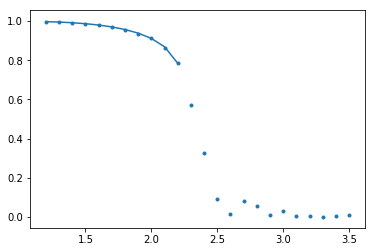

In [68]:
plt.scatter(t, m_abs, marker='.')
plt.plot(t, abs_M_fit(t))
#plt.ylim(-0.0008, 0.0008)
#plt.xlim(-0.01, 0.01)

In [46]:
abs_M_fit(t)

/Users/ibhallaladd/opt/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


array([0.9970259 , 0.99477152, 0.99138687, 0.9864996 , 0.97962209,
       0.97007781, 0.95685702, 0.93830358, 0.91131938, 0.86874762,
       0.78475513,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan])

In [56]:
(-0.5)**(0.125)

ValueError: negative number cannot be raised to a fractional power